In [1]:
from proxy_methods_final import *
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel


/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#TODO: MAKE SURE WE ARE COMPARING STANDARDISED TO STANDARDISED
#TODO  FORWARD FILL MISSING DATA
#TODO: CHECK THAT THE CORRECT PARAMS ARE BEING PASSED IN THE PROXY TIMESERIES METHOD AFTER REMOVING THE TICKER
#TODO: CHECK SOLVER

# Load data
---

In [3]:
#Prices data
#-----------------------------------------
prices_data = pd.read_csv('data/reshaped_data.csv')
prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)
prices_data = prices_data.set_index('Date')

#Index data
#-----------------------------------------
index_data = pd.read_csv('ITRAXX-Europe Timeseries 20241127.csv') #To be used for b0
index_data.rename(columns={'AsOf':'Date'}, inplace=True)
index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d-%b-%y')
index_data = index_data.sort_values(by='Date', ascending=True)
#Metadata
#-----------------------------------------
metadata = pd.read_csv('data/metadata.csv')

#Community detection
#-----------------------------------------
correlation_matrix,T,N,company_names = create_correlation_matrix('data/eur_data_standardized_returns.csv')
C_g = calculate_C_g(correlation_matrix, T, N)
result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_39343/3926340139.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)


# Normal CSRA vs Community CSRA
---

In [4]:
# ticker = "AF" #Defined for the purposes of getting the liquid bucket (EVEN THOUGH WE USE THE INDEX)
# date = '2015-12-30'
# liquid_bucket = get_bucket(metadata, company_communities,ticker)[0]
# metadata_with_proxies = calculate_proxies_and_add_to_metadata(metadata, company_communities, prices_data, index_data, liquid_bucket, date)
# # metadata_with_proxies.to_csv('data/metadata_with_proxies.csv', index=False)

In [5]:
#metadata_with_proxies

In [6]:
#Get matching dates in price data and index data
#-----------------------------------------
price_dates = prices_data.index.tolist()

#Extract date portion of the datetime object in the price data
index_dates = index_data['Date'].tolist()

matching_dates = [date for date in price_dates if date in index_dates]

In [7]:
tickers = prices_data.columns.to_list()[0:50] #First 10 tickers
dates = matching_dates[0:10] #First 30 dates
liquid_bucket = get_bucket(metadata, company_communities,tickers[0])[0]
proxy_time_series_df = calculate_proxy_time_series(tickers, metadata, company_communities, prices_data, index_data, liquid_bucket, dates)

/Users/alex_1/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/alex_1/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/alex_1/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/alex_1/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/alex_1/anaconda3/lib/

In [8]:
proxy_time_series_df

,Ticker,Date,ActualSpread,ProxyCSRA,ProxyCSRACommunity
0,AAUK,2010-09-14,179.666667,188.974635,127.595482
1,AAUK,2010-09-15,175.666667,188.816959,128.455038
2,AAUK,2010-09-16,174.666667,187.841878,126.074997
3,AAUK,2010-09-17,169.500000,185.686441,125.607317
4,AAUK,2010-09-20,171.833333,185.298821,125.806553
...,...,...,...,...,...
495,BELG,2010-09-21,121.347350,91.874718,59.531958
496,BELG,2010-09-22,117.346599,95.532536,60.842695
497,BELG,2010-09-23,115.288341,95.484531,62.748694
498,BELG,2010-09-24,134.826449,90.580632,60.618058


In [9]:
rmse_csra_normal_list, rmse_csra_communities_list = calculate_rmse_curves(proxy_time_series_df, dates)

In [10]:
# diff = np.array(rmse_csra_normal_list) - np.array(rmse_csra_communities_list)


# stat, p = shapiro(diff)
# print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

# if p > 0.05:
#     print("The differences appear to be normally distributed (fail to reject H0).")
# else:
#     print("The differences do not appear to be normally distributed (reject H0).")


In [11]:
# # Perform the paired t-test
# t_stat, p_value = ttest_rel(rmse_csra_normal_list, rmse_csra_communities_list)
# print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# # Interpret the result
# alpha = 0.05  # significance level

# p_value_one_tailed = p_value / 2


# if (p_value_one_tailed < alpha) and (t_stat > 0):  # for H1: μ_d > 0
#     print("Reject the null hypothesis for a one-tailed test: Method 1 has higher RMSE.")
# else:
#     print("Fail to reject the null hypothesis for a one-tailed test.")


In [12]:
# from scipy.stats import t
# df = 9        # Degrees of freedom

# # Two-tailed p-value
# p_value_two_tailed = 2 * (1 - t.cdf(t_stat, df))

# print(p_value)
# print(p_value_two_tailed)

In [13]:
# set global plotting format
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

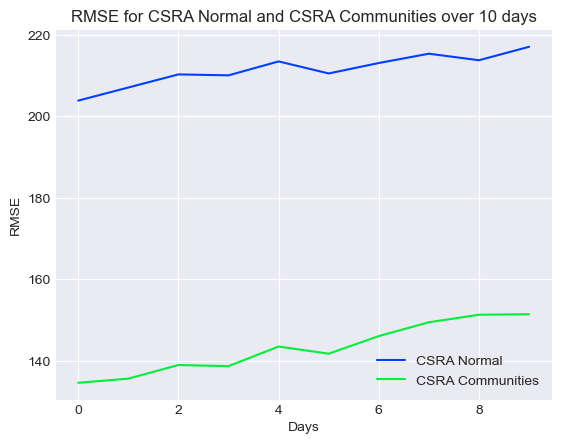

In [14]:
plot_rmse_curves(rmse_csra_normal_list, rmse_csra_communities_list, dates)

In [15]:
calculate_percentage_better(rmse_csra_normal_list, rmse_csra_communities_list)

Number of days where RMSE for normal CSRA method > RMSE for community CSRA method : 10
Percentage of days where CSRA Communities method is better: 100.0%


In [16]:
paired_t_test(rmse_csra_normal_list, rmse_csra_communities_list)

Shapiro-Wilk Test Statistic: 0.9103896021842957, p-value: 0.2836778461933136
CHECKING FOR NORMALITY OF DIFFERENCES
--------------------------------------
The differences appear to be normally distributed (fail to reject H0).
Since the differences are normally distributed, we can perform a paired t-test
PAIRED T-TEST RESULTS 
--------------------------------------
Paired T-Test Statistic: 72.01831674877215, p-value: 9.700717496389478e-14
Reject the null hypothesis for a one-tailed test: Method 1 has higher RMSE.
Therefore the average RMSE for the normal CSRA method is significantly greater than the average RMSE for the community CSRA method.
